<a href="https://colab.research.google.com/github/Shriharsh-Deshmukh/100-Days-100-Models/blob/main/(Pr_9)california_housing_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import seaborn as sns

In [55]:
sns.set(style="whitegrid")

In [56]:
california = fetch_california_housing()

In [57]:
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [60]:
y_pred = model.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.255553781221915
R² Score: 0.804981661858749


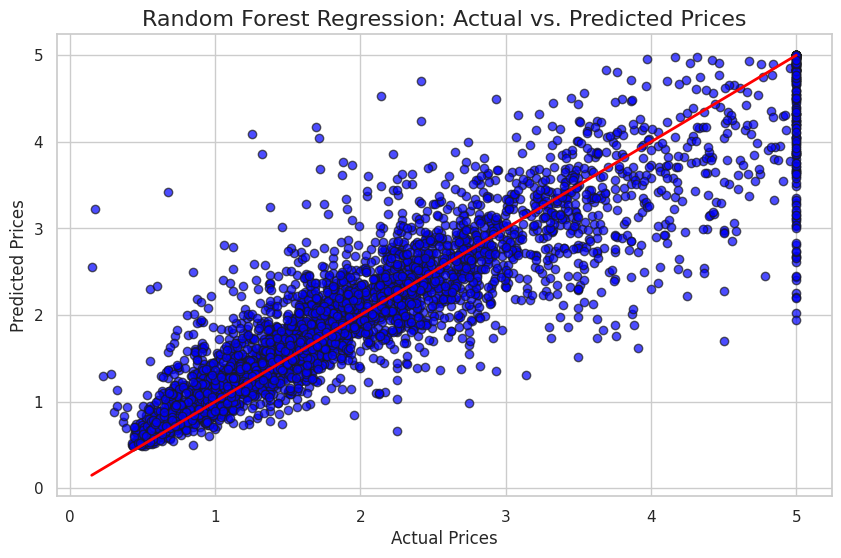

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Random Forest Regression: Actual vs. Predicted Prices", fontsize=16)
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.grid(True)
plt.show()

In [63]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

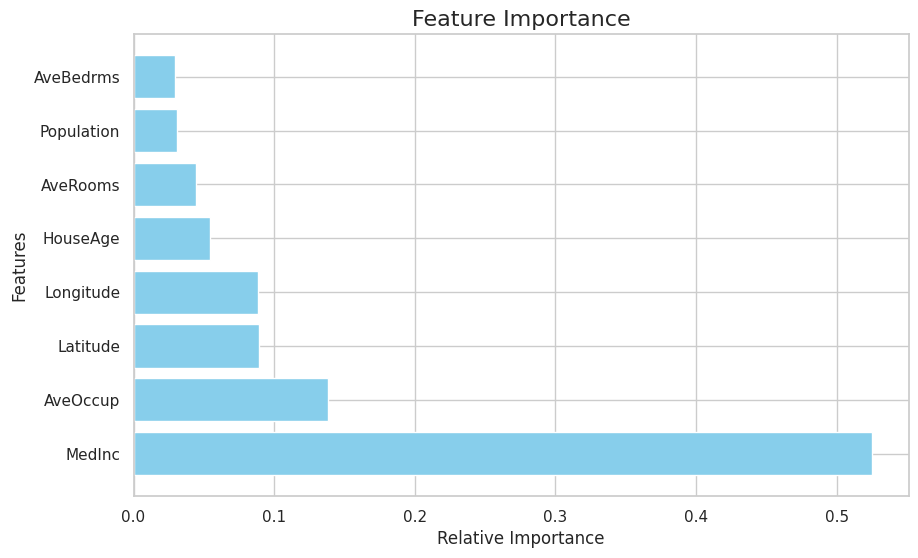

In [64]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns[indices], importances[indices], color='skyblue')
plt.title("Feature Importance", fontsize=16)
plt.xlabel("Relative Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()